# Plotting examples for ForMoSA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Give the path to ForMoSA to be able to import it. No need when this will be a pip package
base_path = '/Users/ppalmabifani/Desktop/exoAtm/c0_ForMoSA/ForMoSA/ForMoSA/' 
sys.path.insert(1, base_path)
from plotting.plotting_class import ComplexRadar
from plotting.plotting_class import PlottingForMoSA


ForMoSA - Corner plot


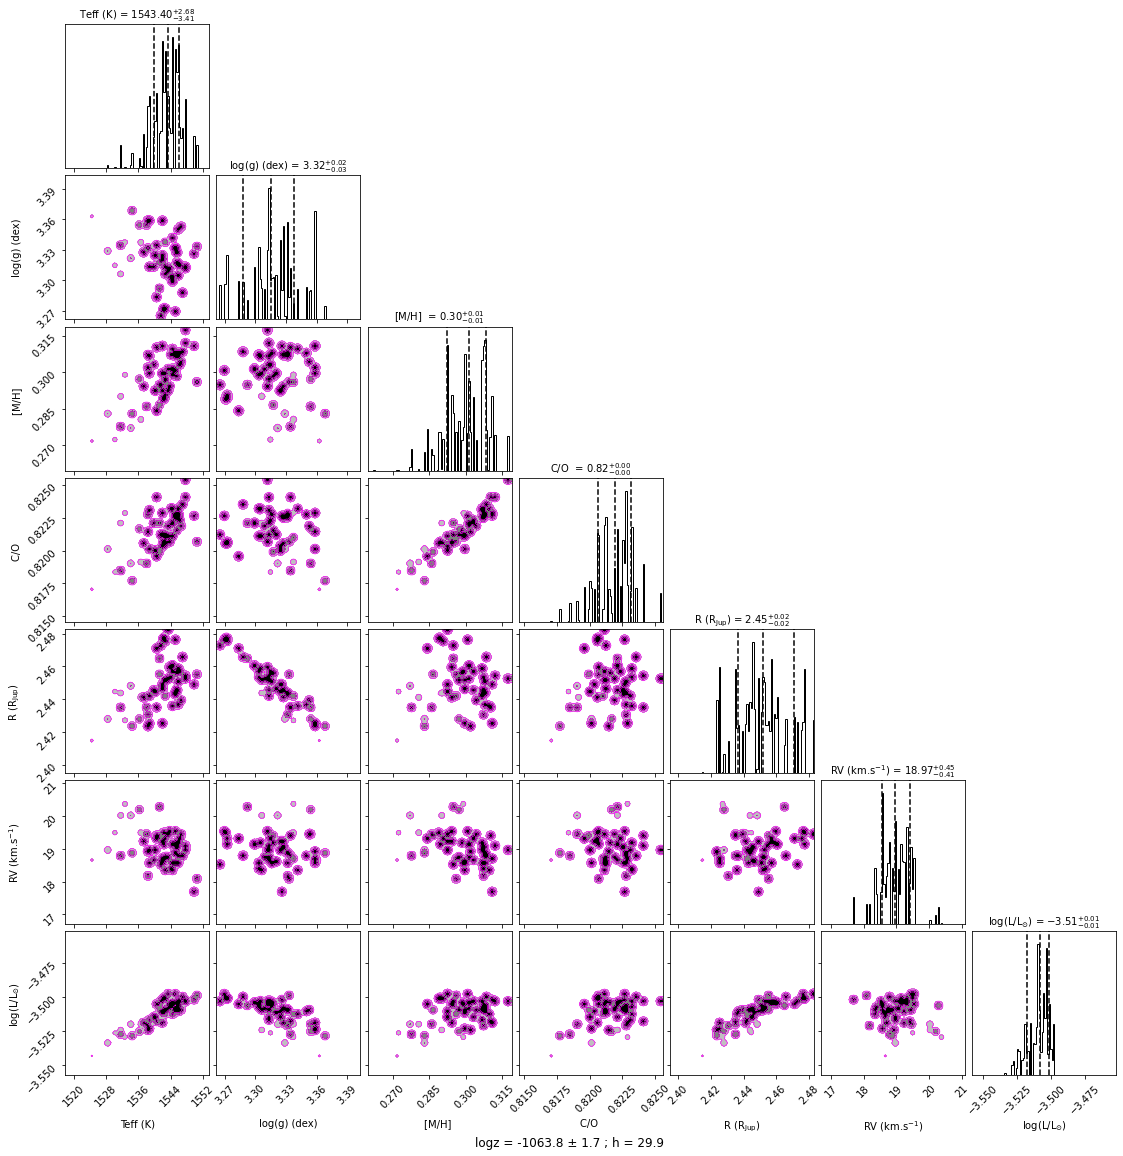

ForMoSA - Posteriors chains for each parameter


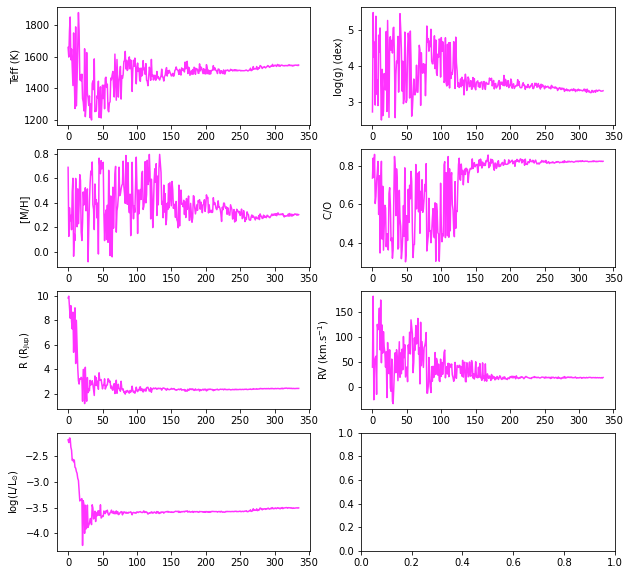

ForMoSA - Radar plot


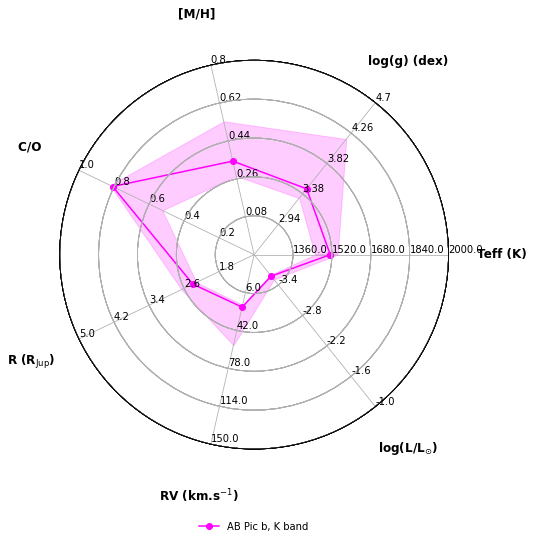

ForMoSA - Best fit and residuals plot


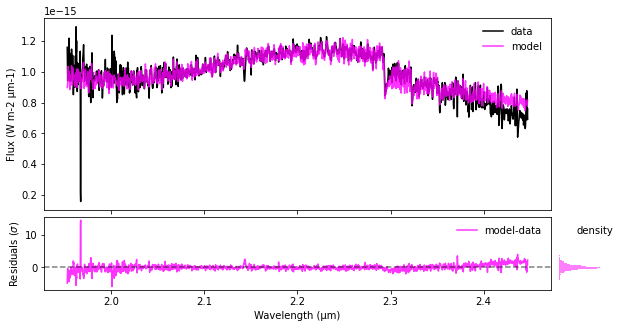

ForMoSA - Pressure-Temperature profile


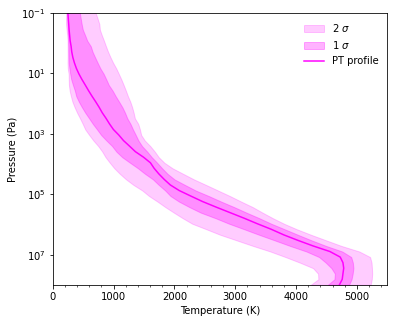

In [2]:

# Initialize the plotting class
config_path = '/Users/ppalmabifani/Desktop/exoAtm/c0_ForMoSA/ForMoSA/DEMO/inputs/test_config_ABPicb.ini'
plotForMoSA = PlottingForMoSA(config_path, 'magenta')

# PLOT: Corner plot
# plotting functions return the fig object -> you can edit the axes, overplot text/curves, save, etc...
plotForMoSA.plot_corner(levels_sig=[0.997, 0.95, 0.68], bins=100, quantiles=(0.16, 0.5, 0.84), burn_in=0)
#plt.savefig('') 
plt.show()

# PLOT: Chains of posteriors
plotForMoSA.plot_chains(figsize=(10,10))
#plt.savefig('')
plt.show()

# You can access to some parametes since we are working with a class
posteriors_chains = plotForMoSA.posterior_to_plot
posteriors_names = plotForMoSA.posteriors_names

# PLOT: Radar plot
# You need to define the ranges for each parameter, looking at the chain plots can be useful
ranges = [(1200,2000),
          (2.5,4.7),
          (-0.1,0.8),
          (0,1),
          (1,5),
          (-30,150),
          (-4,-1)]
plotForMoSA.plot_radar(ranges,label='AB Pic b, K band',quantiles=[0.16, 0.5, 0.84],chiffres=[0,2,2,2])
plt.show()

# PLOT: Spectra and residuals
plotForMoSA.plot_fit(figsize=(10, 5), uncert='no')
plt.show()

plotForMoSA.plot_PT(figsize=(6,5))
plt.show()